In [13]:
#Loading in data and importing necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('drive')
flood_states_data = pd.read_csv("drive/My Drive/floodPreproc.csv")

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [14]:
flood_data = flood_states_data#.drop(['ALABAMA', 'ALASKA', 'AMERICAN SAMOA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA', 'FLORIDA', 'GEORGIA', 'GUAM', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'PUERTO RICO', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGIN ISLANDS', 'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING', 'Storm',	'Unknown',	'dam break,dam release',	'heavy rain',	'heavy rain,snowmelt',	'ice jam',	'snowmelt'], axis = 1)
#train test split shuffles values
y = flood_data["DAMAGE"]
X = flood_data.drop(columns= "DAMAGE")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [3]:
print("X_train dimension: ", X_train.shape)
print("X_test dimension: ", X_test.shape)
print("y_train dimension: ", y_train.shape)
print("y_test dimension: ", y_test.shape)

X_train dimension:  (33360, 74)
X_test dimension:  (8341, 74)
y_train dimension:  (33360,)
y_test dimension:  (8341,)


55468364.697274484
55484876.78774426


<ipython-input-4-2727a1ae3044>:10: RuntimeWarning: invalid value encountered in log10
  plt.scatter(np.log10(y_test), np.log10(predictions))


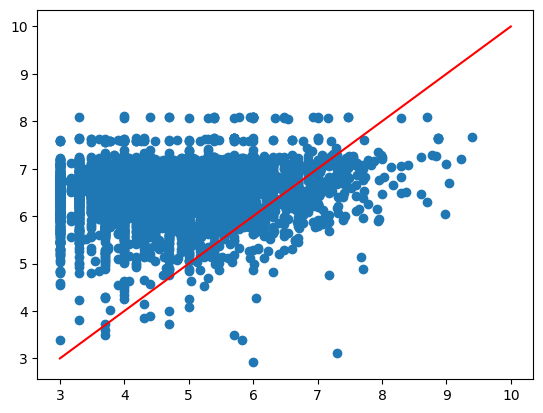

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
predictions = regression_model.predict(X_test)
print(y_test.std())
print(np.sqrt(mean_squared_error(y_test, predictions)))
plt.plot([3, 10], [3, 10], color='red')
plt.scatter(np.log10(y_test), np.log10(predictions))


55468364.697274484
55053214.79691166


<ipython-input-5-bd8c85b6bfb0>:9: RuntimeWarning: invalid value encountered in log10
  plt.scatter(np.log10(y_test), np.log10(predictions))


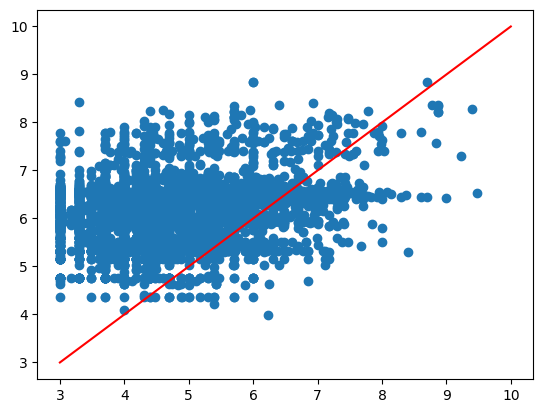

In [5]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting_model = GradientBoostingRegressor(max_depth=2, random_state=0)
gradient_boosting_model.fit(X_train, y_train)
predictions = gradient_boosting_model.predict(X_test)
print(y_test.std())
print(np.sqrt(mean_squared_error(y_test, predictions)))
plt.plot([3, 10], [3, 10], color='red')
plt.scatter(np.log10(y_test), np.log10(predictions))

55468364.697274484
55480449.28541429


<ipython-input-6-fca3c17790b8>:9: RuntimeWarning: invalid value encountered in log10
  plt.scatter(np.log10(y_test), np.log10(predictions))


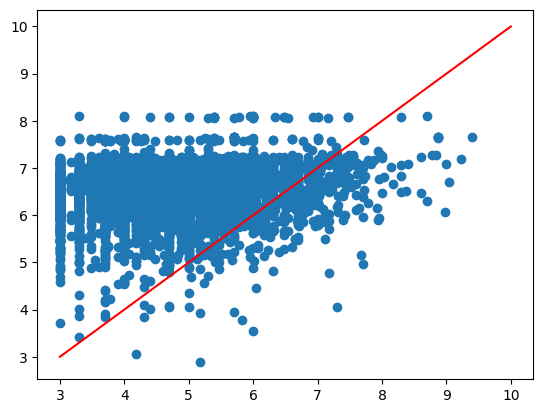

In [6]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
predictions = ridge_model.predict(X_test)
print(y_test.std())
print(np.sqrt(mean_squared_error(y_test, predictions)))
plt.plot([3, 10], [3, 10], color='red')
plt.scatter(np.log10(y_test), np.log10(predictions))

55468364.697274484
63456456.71531767


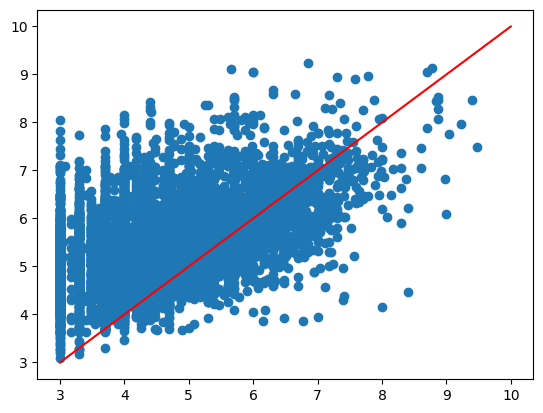

In [7]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
predictions = forest_model.predict(X_test)
print(y_test.std())
print(np.sqrt(mean_squared_error(y_test, predictions)))
plt.plot([3, 10], [3, 10], color='red')
plt.scatter(np.log10(y_test), np.log10(predictions))

55468364.697274484
54932340.75464935


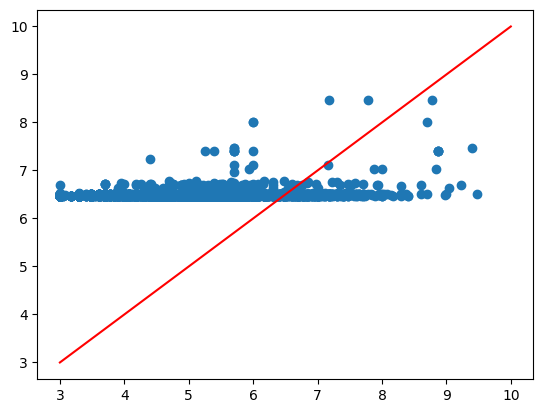

In [21]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
# eta is the learning rate(amount weight of each
# attribute is update while training). After trial
# and error, a learning rate of 0.0001 gave the best results.

XGBModel = XGBRegressor(eta=0.001)
XGBModel.fit(X_train, y_train)
predictions = XGBModel.predict(X_test)
print(y_test.std())
print(np.sqrt(mean_squared_error(y_test, predictions)))
plt.plot([3, 10], [3, 10], color='red')
plt.scatter(np.log10(y_test), np.log10(predictions))